In [2]:
#https://developers.douban.com/wiki/?title=api_v2
import requests

In [3]:
url = "https://api.douban.com/v2/book/1220562"
result = requests.get(url)

In [7]:
import json
book = json.loads(result.text)

In [11]:
url = "https://api.douban.com/v2/movie/top250"
result = requests.get(url)
top = json.loads(result.text)

In [15]:
top.keys()

dict_keys(['count', 'start', 'total', 'subjects', 'title'])

In [29]:
url = "https://api.douban.com/v2/movie/top250?start=0&count=250"
result = requests.get(url)
top = json.loads(result.text)

In [32]:
len(top['subjects'])

100

In [35]:
top['subjects'][0].keys()

dict_keys(['rating', 'genres', 'title', 'casts', 'collect_count', 'original_title', 'subtype', 'directors', 'year', 'images', 'alt', 'id'])

In [36]:
top['subjects'][0]['title']

'肖申克的救赎'

In [7]:
import json
base_url = "https://api.douban.com/v2/movie/top250"
params = {}
params['start'] = 0
params['count'] = 10
response = requests.get(base_url, params)
top = json.loads(response.text)
top.keys()

dict_keys(['total', 'subjects', 'count', 'title', 'start'])

In [11]:
import time
step = 50
params['count'] = 50
movie_top_250 = {}
base_url = "https://api.douban.com/v2/movie/top250"
for start in range(0, 250, step):
    params['start'] = start
    try:
        print("Getting top 250 movie informations from {} to {}".format(start, start + params['count']))
        response = requests.get(base_url, params)
        subjects = json.loads(response.text)['subjects']
        for subject in subjects:
            movie_top_250[subject['title']] = subject
        
    except Exception as e:
        print(e)
        print("Getting movie informations failed.")
    
    time.sleep(1)
#保存到json文件
with open("movie_top_250.json", 'w') as f:
    print("Writting movie informations to json file.")
    json.dump(movie_top_250, f)

Getting top 250 movie informations from 0 to 50
Getting top 250 movie informations from 50 to 100
Getting top 250 movie informations from 100 to 150
Getting top 250 movie informations from 150 to 200
Getting top 250 movie informations from 200 to 250


In [15]:
movie_info = movie_top_250.values()

In [17]:
type(movie_info) is list

False

In [2]:
import pandas as pd
import json
movie_info = json.load(open('movie_top_250.json', 'r')).values()

In [29]:
movie_info = list(movie_info)
for index, movie in enumerate(movie_info):
    #print(movie['rating'])
    movie_info[index]['average'] = movie['rating']['average']
    movie_info[index]['max'] = movie['rating']['max']
    movie_info[index]['stars'] = movie['rating']['stars']
    movie_info[index]['min'] = movie['rating']['min']
movie_info[0]

{'alt': 'https://movie.douban.com/subject/2149806/',
 'average': 8.8,
 'casts': [{'alt': 'https://movie.douban.com/celebrity/1036923/',
   'avatars': {'large': 'https://img3.doubanio.com/view/celebrity/s_ratio_celebrity/public/p18584.jpg',
    'medium': 'https://img3.doubanio.com/view/celebrity/s_ratio_celebrity/public/p18584.jpg',
    'small': 'https://img3.doubanio.com/view/celebrity/s_ratio_celebrity/public/p18584.jpg'},
   'id': '1036923',
   'name': '本木雅弘'},
  {'alt': 'https://movie.douban.com/celebrity/1098533/',
   'avatars': {'large': 'https://img1.doubanio.com/view/celebrity/s_ratio_celebrity/public/p50678.jpg',
    'medium': 'https://img1.doubanio.com/view/celebrity/s_ratio_celebrity/public/p50678.jpg',
    'small': 'https://img1.doubanio.com/view/celebrity/s_ratio_celebrity/public/p50678.jpg'},
   'id': '1098533',
   'name': '广末凉子'},
  {'alt': 'https://movie.douban.com/celebrity/1037053/',
   'avatars': {'large': 'https://img3.doubanio.com/view/celebrity/s_ratio_celebrity/pu

In [30]:
df_movie = pd.DataFrame(list(movie_info))

In [9]:
df_rating = pd.DataFrame(df_movie['rating'])

In [20]:
df_rating.columns

Index(['rating'], dtype='object')

In [31]:
df_movie.columns

Index(['alt', 'average', 'casts', 'collect_count', 'directors', 'genres', 'id',
       'images', 'max', 'min', 'original_title', 'rating', 'stars', 'subtype',
       'title', 'year'],
      dtype='object')

In [61]:
top_10_years = df_movie['title'].groupby(df_movie['year']).count().sort_values(ascending=False)[:10]

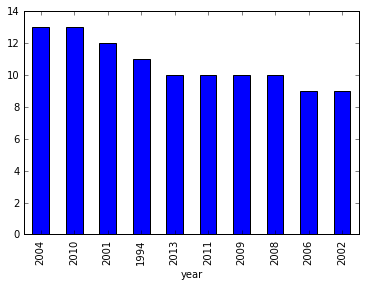

In [64]:
top_10_years.plot(kind='bar')

In [ ]:
df_movie['title'].groupby(df_movie['year']).count().sort_values

In [65]:
df_movie.columns

Index(['alt', 'average', 'casts', 'collect_count', 'directors', 'genres', 'id',
       'images', 'max', 'min', 'original_title', 'rating', 'stars', 'subtype',
       'title', 'year'],
      dtype='object')

In [ ]:
#一种设置ubuntu下matplotlib显示中文字体的方法
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/usr/share/fonts/chinese/wqy-microhei.ttf', size=14)   
#plt.title("高分电影年度分布",  fontproperties=font)

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


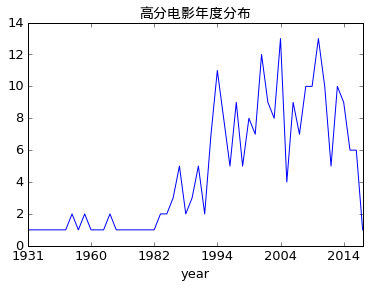

In [86]:
import matplotlib.pyplot as plt
df_movie.groupby('year')['title'].count().plot()
plt.rc('font', family='SimHei', size=13)
plt.title("高分电影年度分布",  fontproperties=font)

In [70]:
df_movie.directors[0][0]['name']

'泷田洋二郎'

In [74]:
df_movie[['title', 'original_title', 'year', 'average', 'collect_count', 'genres']].sort_values('average', ascending=False)

,title,original_title,year,average,collect_count,genres,subtype
86,肖申克的救赎,The Shawshank Redemption,1994,9.6,1244921,"[犯罪, 剧情]",movie
119,控方证人,Witness for the Prosecution,1957,9.6,119893,"[剧情, 犯罪, 悬疑]",movie
31,美丽人生,La vita è bella,1997,9.5,584866,"[剧情, 喜剧, 爱情]",movie
16,霸王别姬,霸王别姬,1993,9.5,897626,"[剧情, 爱情, 同性]",movie
182,十二怒汉,12 Angry Men,1957,9.4,227137,[剧情],movie
57,这个杀手不太冷,Léon,1994,9.4,1186303,"[剧情, 动作, 犯罪]",movie
120,阿甘正传,Forrest Gump,1994,9.4,1044642,"[剧情, 爱情]",movie
53,辛德勒的名单,Schindler's List,1993,9.4,550418,"[剧情, 历史, 战争]",movie
157,海豚湾,The Cove,2009,9.3,238491,[纪录片],movie
243,盗梦空间,Inception,2010,9.3,1037866,"[剧情, 科幻, 悬疑]",movie
